# 神经网络

## 从感知机到神经网络

![](https://i.stack.imgur.com/gIHAN.jpg)

神经网络可以划分为三层：

* 输入层
* 中间层（隐藏层）
* 输出层

一般输入层仅仅是输入数据，并没有对数据进行处理，所以编号为 第0层。总的层数为 3 层，但我们为了于编号一致，将上图中的网络称为 2层网络。

每一层网络由若干个 **节点**（也叫 **神经元**）构成，每个节点内部都有相应的处理方法。比如，前面已经学过了感知机的表达式。这里我们对表达式进行拆分：

$$
y=h(a)\\
a=b+w_1x_1+w_2x_2\\
h(x)=\begin{cases}
0 & x\leq 0\\
1 & x > 0
\end{cases}
$$

我们将 $h(x)$ 称为 **激活函数**（action function），意思是当输入超出阈值时，就会切换输出值。在感知机中，激活函数是一个阶跃函数。故感知机的节点内部如下图：

![](https://i1.wp.com/www.jessicayung.com/wp-content/uploads/2016/12/perceptron.png?fit=397%2C262&ssl=1)

## 常见的激活函数

### 阶跃函数

$$
h(x)=\begin{cases}
0 & x\leq 0\\
1 & x > 0
\end{cases}
$$

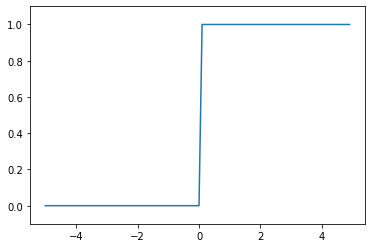

In [ ]:
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=np.int)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # 指定图中绘制的y轴的范围
plt.show()

sigmoid 函数

$$
h(x)=\frac{1}{1+\exp(-x)}
$$

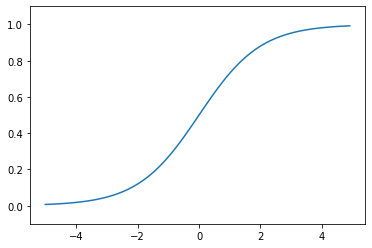

In [ ]:
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

ReLU函数（Rectified Linear Unit）

$$
h(x)=\begin{cases}
0 & x\leq 0\\
x & x > 0
\end{cases}
$$



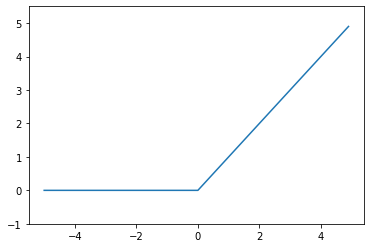

In [ ]:
import numpy as np
import matplotlib.pylab as plt


def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

我们可以注意到，上面三个都是非线性函数。于是我们就产生了一个问题：能不能用 $y=cx$ 这样的线性函数？显然不能。因为线性函数的叠加依然是线性函数，比如叠加三次 $y=c\times c\times c x=ax$$\;(a=c^3)$，那么我们中间层就完全可以用一层来代替，那么就无法发挥多层网络的优势。

## 利用矩阵乘法实现神经网络

假如有 2 个输入 $x_1,x_2$ ，3个输出 $y_1,y_2,y_3$，如果要实现：

$$
y_1=1x_1+2x_2\\
y_2=3x_1+4x_2\\
y_3=5x_1+6x_3\\
$$

那么可以写成矩阵相乘：

$$
\begin{align}
Y&=X \cdot\; W\\
\begin{bmatrix}
y_1 & y_2 & y_3
\end{bmatrix}&=
\begin{bmatrix}
x_1 & x_2
\end{bmatrix}\cdot
\begin{bmatrix}
1 & 3 & 5\\
2 & 4 & 6
\end{bmatrix}\\
3&=2 \cdot\; 2\times 3
\end{align}
$$

注意到权重矩阵 $W$ 的行数等于 $X$ 的列数，$W$ 的列数等于 $Y$ 的列数。也就是 $W$ 的形状为 $X_列 \times Y_列$

为了区分不同层，我们在符号的右上角添加数字来表示：$w^{(1)}_{2,3}$ 表示这个权重属于第 1 层，第 2 个神经元，接受的是上一层第 3 个神经元的输入。类似的，$x^{(1)}_1$ 和 $y^{(1)}_1$ 表示第 1 层第 1 个输入或输出。

上面我们忽略了激活函数和偏置，加上激活函数和偏置的表达式应该为：

$$
Y=h(A)=h(XW+B)
$$

比如一个三层的神经网络可以写成：

```python
a1 = np.dot(x, W1) + b1
z1 = sigmoid(a1)

a2 = np.dot(z1, W2) + b2
z2 = sigmoid(a2)

a3 = np.dot(z2, W3) + b3
y = softmax(a3)
```

## 输出层

如果是需要具体数字，比如回归预测问题，则激活函数只需要用 **恒定函数** 即可。

如果是需要概率，比如分类问题，则需要使用 softmax 函数：

$$
y_k = \frac{\exp(a_k)}{\sum_{i=1}^n \exp(a_i)}
$$

（使用指数函数是为了使负数 $a_i$ 也可以用于计算概率）

为了避免指数爆炸，一般会减去一个很大的数（结果依然不变）：

$$
y_k = \frac{\exp(a_k-C)}{\sum_{i=1}^n \exp(a_i-C)}
$$

In [ ]:
import numpy as np


a=np.array([1010,1000,990])
np.exp(a)/np.sum(np.exp(a)) #出现了指数爆炸

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


array([nan, nan, nan])

In [ ]:
c=np.max(a)
np.exp(a-c)/np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [ ]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 溢出对策
    return np.exp(x) / np.sum(np.exp(x))

# 开始搭建神经网络

## 手写数字识别

MNIST 手写数字图像集是机器学习最常用的数据集之一。有句话说，如果你的网络在 MNIST 上跑不过，那就别指望它能用。

下面是《深度学习入门》中用于下载和读取 MNIST 的程序。


In [ ]:
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
from IPython.terminal.embed import InteractiveShellEmbed
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

## if you run in terminal, run this
# dataset_dir = os.path.dirname(os.path.abspath(__file__))
## if you run in IPython, run this
ip_shell = InteractiveShellEmbed()
dataset_dir = ip_shell.magic("%pwd")

save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")
    
def download_mnist():
    for v in key_file.values():
       _download(v)
        
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")    
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")
    
    return data
    
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])    
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])
    
    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T
    

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """读入MNIST数据集
    
    Parameters
    ----------
    normalize : 将图像的像素值正规化为0.0~1.0
    one_hot_label : 
        one_hot_label为True的情况下，标签作为one-hot数组返回
        one-hot数组是指[0,0,1,0,0,0,0,0,0,0]这样的数组
    flatten : 是否将图像展开为一维数组
    
    Returns
    -------
    (训练图像, 训练标签), (测试图像, 测试标签)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


if __name__ == '__main__':
    init_mnist()

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


但最好的方式还是通过 `tf.keras.datasets.mnist` 来使用，这个会自动下载 mnist。

上面的程序中中有用于读取数据的 `load_minst()` 函数。运行后，它会以“（训练图像，训练标签），（测试图像，测试标签）” 的形式读入。此外，它有三个参数：

* `normalize=True` 正规化，即单个像素是 0\~255（False） 还是 0\~1（True）
* `flatten=True` 一维化，即是一张 28x28 的图片，还是一张 1x784 的长线 
* `one_hot_label=False` one-hot标签，即标签是 0~9，还是 `[0,0,1,0,0,0,0,0,0,0]`

`tf.keras.datasets.mnist` 也有 `load_minst()` 函数，但它不会对数据做任何处理。

下面来读入看一下：


(60000, 1, 28, 28) (60000,) (10000, 1, 28, 28) (10000,)


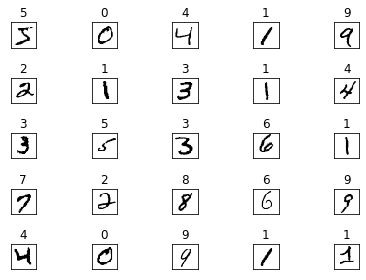

In [ ]:
import os
# import tensorflow as tf
import matplotlib.pyplot as plt
 
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# tf.compat.v1.enable_eager_execution()
 
# print("TensorFlow Version:\t", tf.__version__)

## 加载 MNIST
# mnist = tf.keras.datasets.mnist

## 读入数据
(x_train, y_train), (x_test, y_test) = load_mnist(flatten=False, normalize=True)

print(x_train.shape, 
      y_train.shape,
      x_test.shape,
      y_test.shape
) # (60000, 1, 28, 28) (60000,) (10000, 1, 28, 28) (10000,)

fig, ax = plt.subplots(nrows=5, ncols=5, sharex='all', sharey='all')
ax = ax.flatten()
## 读取前 25 张图
for i in range(25):
    img = x_train[i].reshape(28, 28)
    ax[i].set_title(y_train[i])
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

根据数据集，我们可以设计一个含 2 个隐藏层的网络：

* 输入 784
* 隐藏层1 50个神经元 784x50
* 隐藏层2 100个神经元 50x100
* 输出 100x10

In [ ]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

由于还没有参数，所以上面的神经网络并不能运行。为了好玩，我们可以选择随机生成参数，比如

In [ ]:
(x_train, y_train), (x_test, y_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)

network={}
network['W1']=np.random.rand(784, 50)
network['W2']=np.random.rand(50, 100)
network['W3']=np.random.rand(100, 10)
network['b1']=np.random.rand(50)
network['b2']=np.random.rand(100)
network['b3']=np.random.rand(10)


accuracy_cnt = 0
for i in range(len(x_test)):
    y = predict(network, x_test[i])
    p= np.argmax(y) # 获取概率最高的元素的索引
    if p == y_test[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x_test)))


Accuracy:0.0958


准确率低得可怜……

上面仅仅是对一个训练样本进行处理。一般训练时，输入时是成“**批 patch**”输入的，像下面这样：

In [ ]:
batch_size = 100 # 批数量
accuracy_cnt = 0


for i in range(0, len(x_test), batch_size):
    x_batch = x_test[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == y_test[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x_test)))

Accuracy:0.0958
